In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

print("Libraries loaded")


Libraries loaded


In [2]:
df = pd.read_csv("HousingData.csv")

print("Dataset shape:", df.shape)
df.head()


Dataset shape: (506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
TARGET = "MEDV"  # Boston dataset target column

X = df.drop(columns=[TARGET])
y = df[TARGET]

print("X shape:", X.shape)
print("y shape:", y.shape)


X shape: (506, 13)
y shape: (506,)


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



print("Train:", X_train.shape)
print("Test:", X_test.shape)
print("Train:", y_train.shape)
print("Test:", y_test.shape)


Train: (404, 13)
Test: (102, 13)
Train: (404,)
Test: (102,)


In [5]:
numeric_cols = X.select_dtypes(include=['float64','int64']).columns
categorical_cols = X.select_dtypes(include=['object']).columns

numeric_transform = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),
        ("scaler", StandardScaler())
        ])

categorical_transform = Pipeline([
            ("imputer", SimpleImputer(strategy="most_frequent")),
                ("onehot", OneHotEncoder(handle_unknown="ignore"))
                ])

preprocessor = ColumnTransformer([
                    ("num", numeric_transform, numeric_cols),
                        ("cat", categorical_transform, categorical_cols)
                        ])

print("Preprocessing ready")


Preprocessing ready


In [6]:
models = {
      "Linear Regression": LinearRegression(),
          "Ridge Regression": Ridge(),
              "Lasso Regression": Lasso()
              }

print("Basic regression models ready")



Basic regression models ready


In [7]:
results = {}

for name, model in models.items():

    print("\n------------------------------")
    print("Training:", name, flush=True)
    print("------------------------------")

    pipe = Pipeline([
                        ("preprocess", preprocessor),
                                ("model", model)
                                    ])

    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    mse  = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    mae  = mean_absolute_error(y_test, preds)
    r2   = r2_score(y_test, preds)

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}

    print("RMSE:", rmse, flush=True)
print("MAE:", mae, flush=True)
print("R2 :", r2, flush=True)



------------------------------
Training: Linear Regression
------------------------------
RMSE: 4.9983442678463

------------------------------
Training: Ridge Regression
------------------------------
RMSE: 4.998701346223843

------------------------------
Training: Lasso Regression
------------------------------
RMSE: 5.268977537443412
MAE: 3.445245754859784
R2 : 0.6214279000254297


In [8]:
pd.DataFrame(results).T


,RMSE,MAE,R2
Linear Regression,4.998344,3.147609,0.659319
Ridge Regression,4.998701,3.144578,0.659270
Lasso Regression,5.268978,3.445246,0.621428


In [9]:
best_model_name = min(results, key=lambda m: results[m]["RMSE"])
print("Best model =", best_model_name)


Best model = Linear Regression


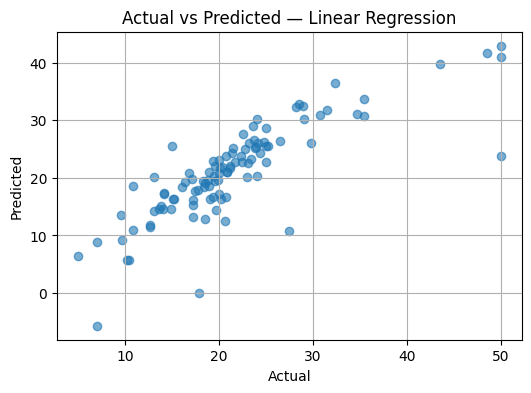

In [10]:
best_model = models[best_model_name]

pipe = Pipeline([
    ("preprocess", preprocessor),
        ("model", best_model)
        ])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

plt.figure(figsize=(6,4))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Actual vs Predicted — {best_model_name}")
plt.grid(True)
plt.show()
